In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15']

In [5]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [8]:
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [9]:
df.waterfront.fillna(value=0, inplace = True)

In [10]:
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [11]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())   
    print('\n')

id 795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
Name: id, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1010    129
1660    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
4800    119
Name: sqft_lot, dtype: int64


floors 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int

In [12]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [13]:
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
15856,1.75


In [14]:
df.loc[df['bedrooms']==11]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
8748,1773100755,520000.0,11,3.0,3000,4960,2.0,0.0,3,7,1918


In [15]:
print('bathrooms', sorted(set(df['bathrooms'])))

bathrooms [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


In [16]:
df.loc[df['bathrooms']>=5]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
300,3225069065,3080000.0,4,5.00,4550,18641,1.0,1.0,3,10,2002
527,3225079035,1600000.0,6,5.00,6050,230652,2.0,0.0,3,11,2001
1162,1247600105,5110000.0,5,5.25,8010,45517,2.0,1.0,3,12,1999
1313,7558700030,5300000.0,6,6.00,7390,24829,2.0,1.0,4,12,1991
1446,8907500070,5350000.0,5,5.00,8000,23985,2.0,0.0,3,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
20968,2149800278,343000.0,6,5.00,2732,7655,2.0,0.0,3,7,2009
21034,2424059170,900000.0,5,6.00,7120,40806,2.0,0.0,3,12,2007
21132,524059063,1800000.0,5,5.00,4490,10279,2.0,0.0,3,10,2013
21328,8835770170,1490000.0,5,6.00,6880,279968,2.0,0.0,3,12,2007


In [17]:
df.loc[df['bathrooms']==8]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7245,6762700020,7700000.0,6,8.0,12050,27600,2.5,0.0,4,13,1910
12764,1225069038,2280000.0,7,8.0,13540,307752,3.0,0.0,3,12,1999


In [18]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [19]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [20]:
for col in df.columns:
    try:
        print(col, df[col].nunique()[:5])
    except:
        print(col, df[col].nunique())   
    print('\n')

id 21419


price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116




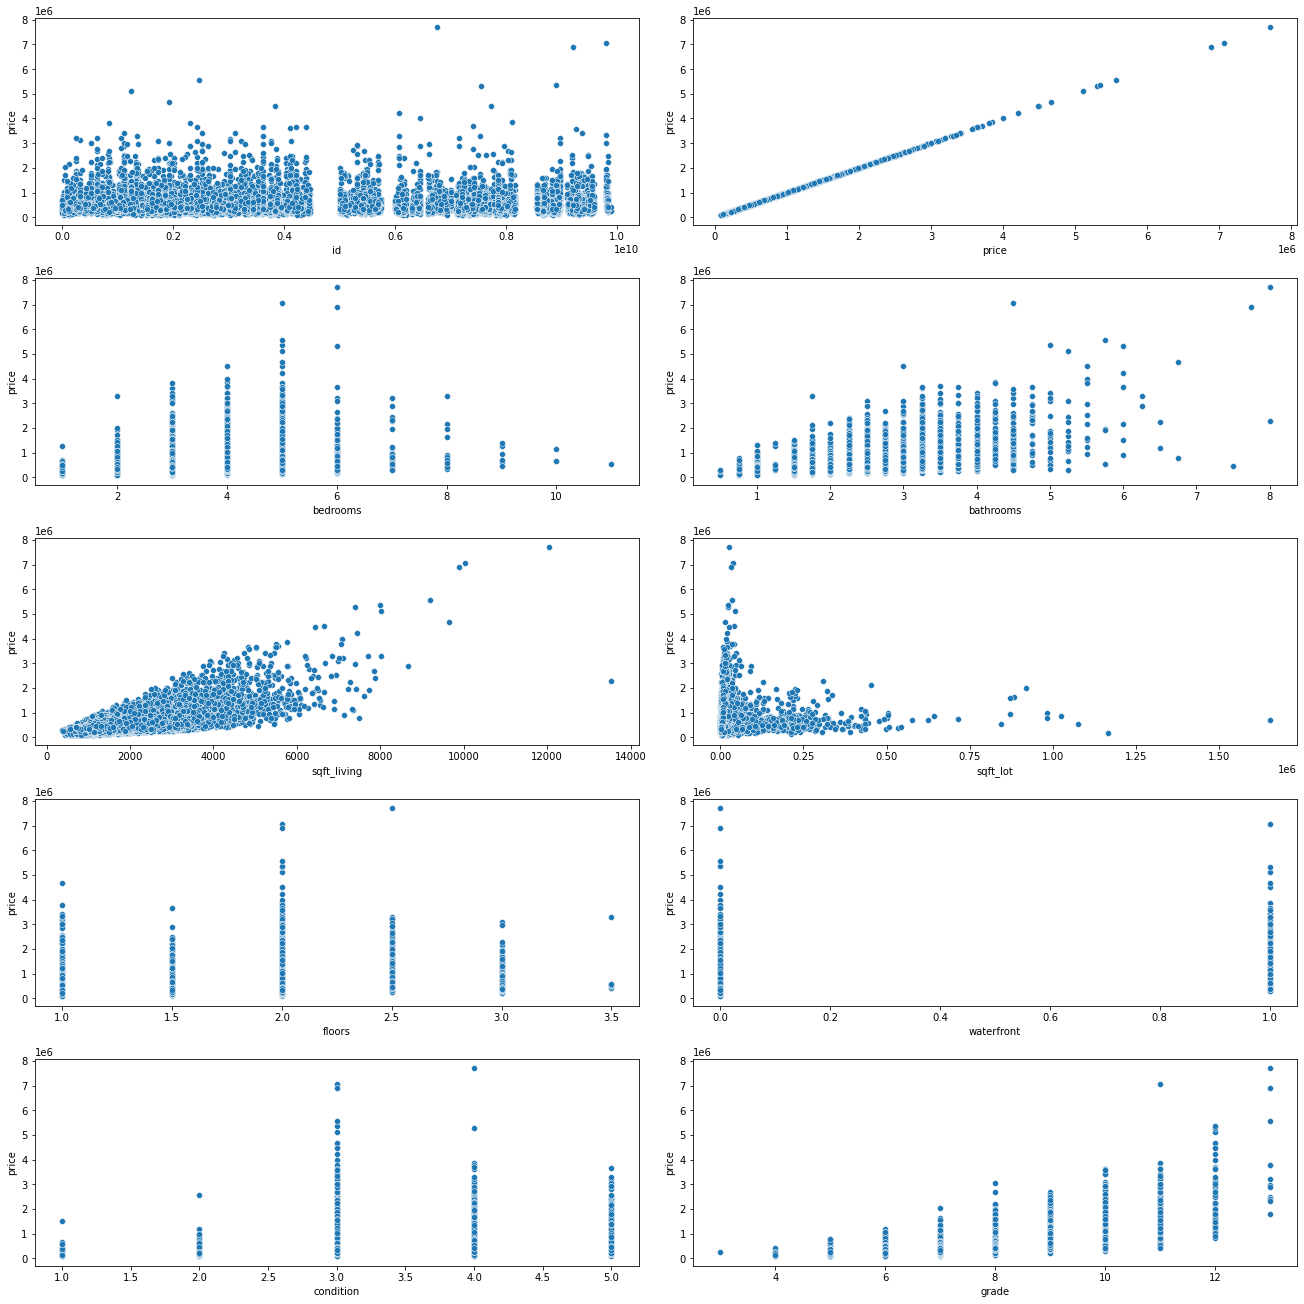

In [21]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)
for axx, column in zip(axes.flatten(), df.columns):
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

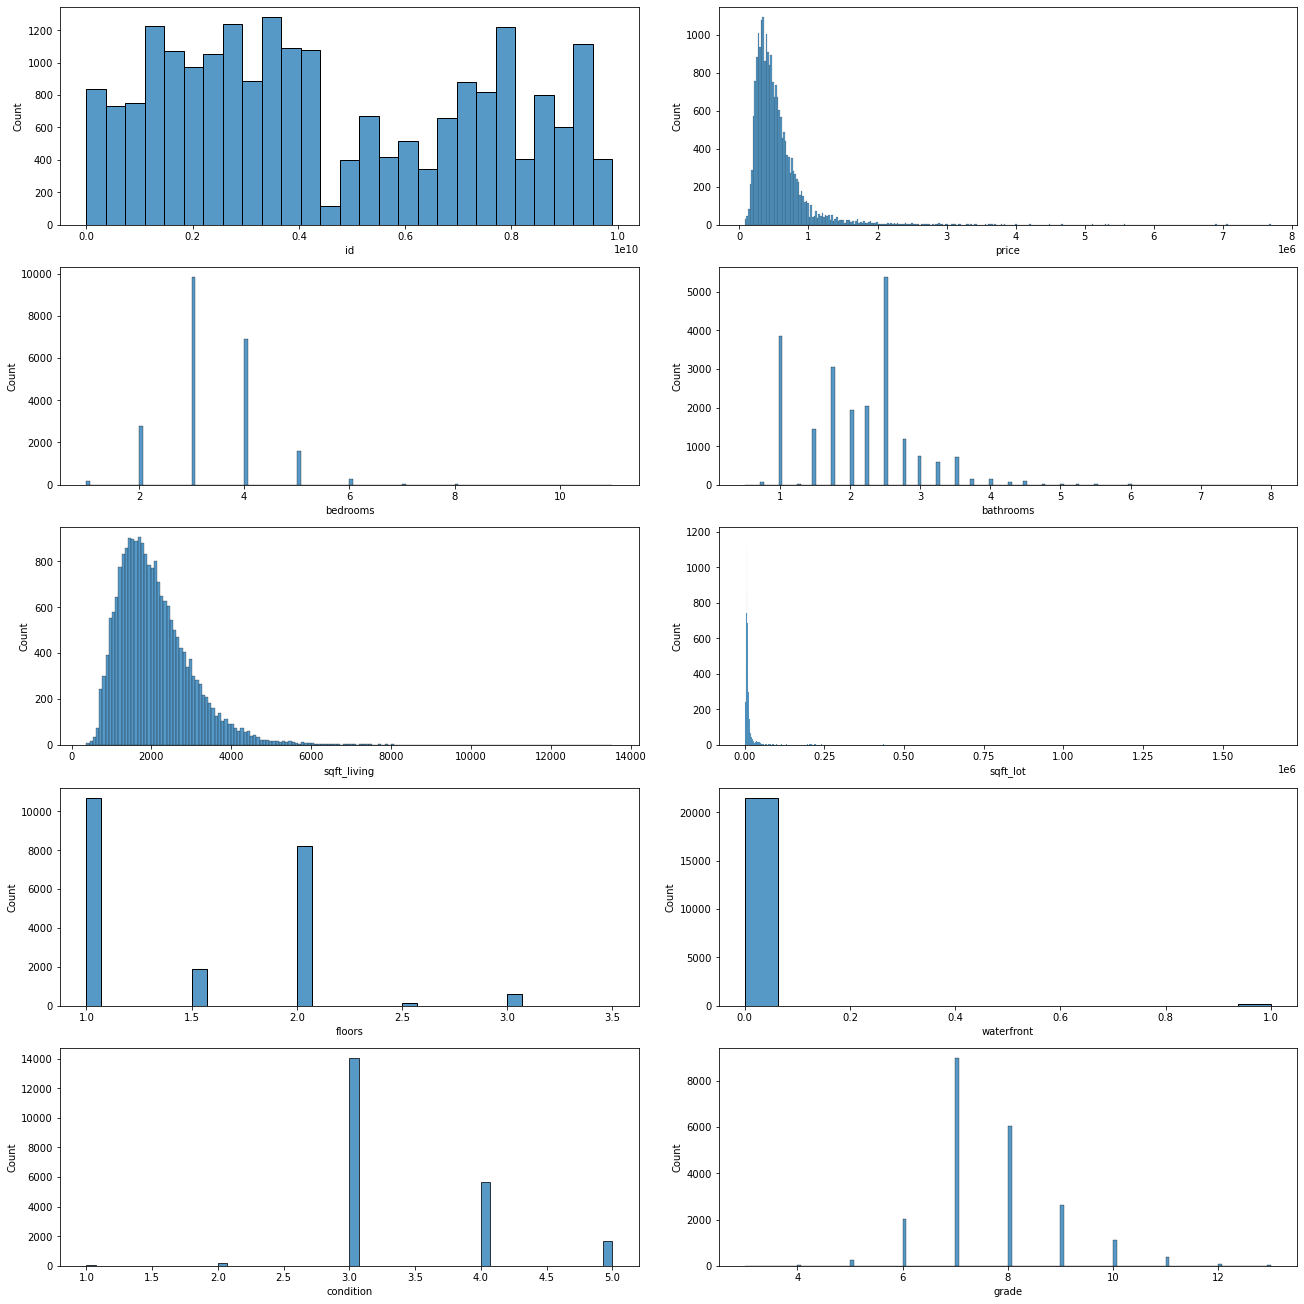

In [22]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.histplot(x=df[column], data=df,ax=axx)
    

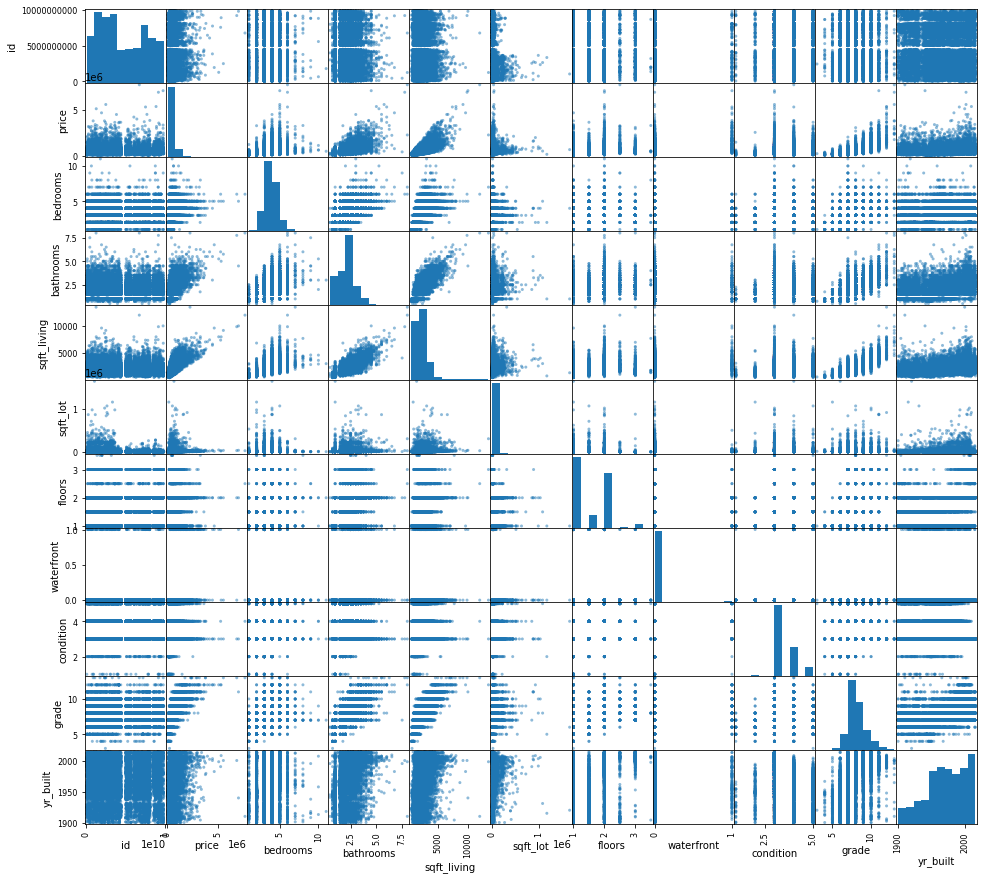

In [23]:
pd.plotting.scatter_matrix(df,figsize  = [16, 15]);

<AxesSubplot:>

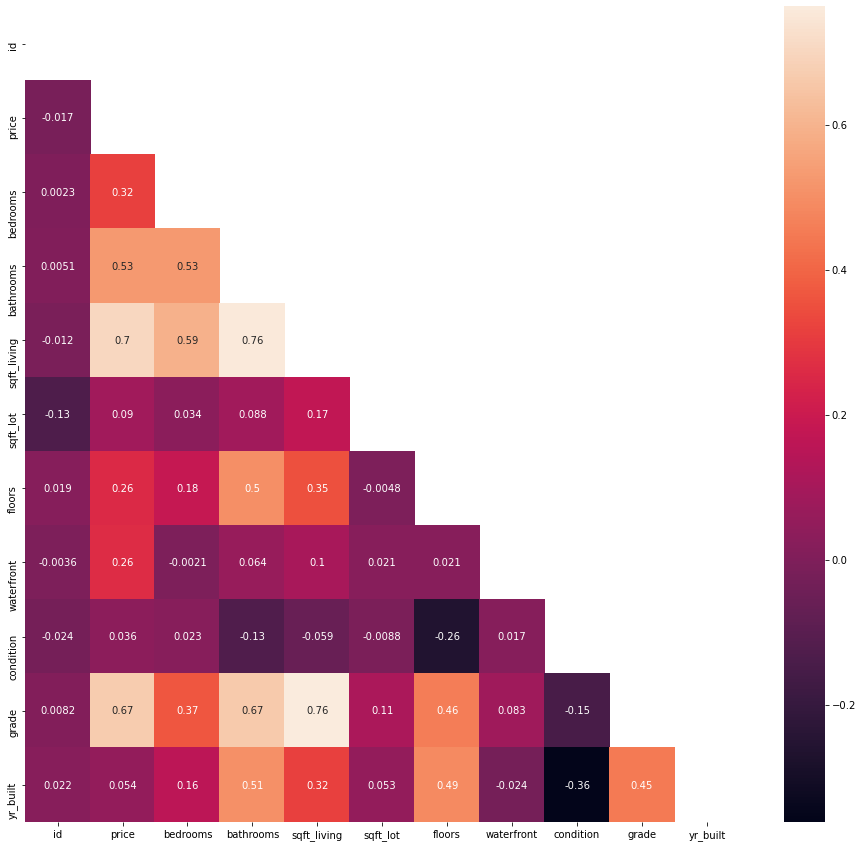

In [24]:
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

In [25]:
x=df.drop('price', axis=1).copy()
y=df['price']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.Series(vif, index=x.columns, name="Variance Inflation Factor")            

id               3.602745
bedrooms         1.671843
bathrooms        2.876091
sqft_living      4.156701
sqft_lot         1.064795
floors           1.515899
waterfront       1.018748
condition        1.037164
grade            2.867499
yr_built       128.740978
Name: Variance Inflation Factor, dtype: float64

In [26]:
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = [1,2,3,4,5,6]
x['yr_built_binned'] = pd.cut(x['yr_built'], bins,labels=labels)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [28]:
categorical=['bedrooms','bathrooms','floors', 'waterfront', 'condition', 'grade','yr_built_binned']
con = ['sqft_living','sqft_lot']

In [29]:
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore" )
ohe.fit(x_train[categorical])
dummies_encoded_train = ohe.transform(x_train[categorical])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns=ohe.get_feature_names(categorical) )


In [30]:
dummies_encoded_test= ohe.transform(x_test[categorical])

In [31]:
dummies_encoded_train

,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,...,grade_11,grade_12,grade_13,yr_built_binned_1.0,yr_built_binned_2.0,yr_built_binned_3.0,yr_built_binned_4.0,yr_built_binned_5.0,yr_built_binned_6.0,yr_built_binned_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
#log_names = [f'{column}_log' for column in df_con.columns]
#logdf = np.log(df_con)
#logdf.columns = log_names
#logdf.hist()

In [34]:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[con])
x_test_scaled = scaler.transform(x_test[con])


In [38]:
x_train_scaled =pd.DataFrame(x_train_scaled, columns= ['sqft_living','sqft_lot'])


non_normal = df['price','sqft_living','sqft_lot']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))

In [39]:
x_train_final = pd.concat([x_train_scaled,dummies_encoded_train], axis=1)

In [40]:
x_train_final

,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,grade_11,grade_12,grade_13,yr_built_binned_1.0,yr_built_binned_2.0,yr_built_binned_3.0,yr_built_binned_4.0,yr_built_binned_5.0,yr_built_binned_6.0,yr_built_binned_nan
0,-0.699232,-0.246646,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.710117,-0.125929,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.129489,-0.243147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.024347,-0.195893,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.454604,-0.265350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,0.160702,-0.223840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17272,-0.971363,-0.334855,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17273,-0.601265,-0.146612,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17274,-1.853067,-0.001809,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
train_final=  pd.concat([y_train,x_train_final], axis=1)

In [42]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: False
sqft_lot: False
bedrooms_1: False
bedrooms_2: False
bedrooms_3: False
bedrooms_4: False
bedrooms_5: False
bedrooms_6: False
bedrooms_7: False
bedrooms_8: False
bedrooms_9: False
bedrooms_10: False
bedrooms_11: False
bathrooms_0.5: False
bathrooms_0.75: False
bathrooms_1.0: False
bathrooms_1.25: False
bathrooms_1.5: False
bathrooms_1.75: False
bathrooms_2.0: False
bathrooms_2.25: False
bathrooms_2.5: False
bathrooms_2.75: False
bathrooms_3.0: False
bathrooms_3.25: False
bathrooms_3.5: False
bathrooms_3.75: False
bathrooms_4.0: False
bathrooms_4.25: False
bathrooms_4.5: False
bathrooms_4.75: False
bathrooms_5.0: False
bathrooms_5.25: False
bathrooms_5.5: False
bathrooms_5.75: False
bathrooms_6.0: False
bathrooms_6.25: False
bathrooms_6.5: False
bathrooms_6.75: False
bathrooms_7.75: False
bathrooms_8.0: False
floors_1.0: False
floors_1.5: False
floors_2.0: False
floors_2.5: False
floors_3.0: False
floors_3.5: False
waterfront_0.0: False
waterfro

In [48]:
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]
train_final.columns=[x.replace('.','_') for x in train_final.columns]

In [49]:
outcome = 'price'
predictors = x_train_final
formula = outcome + '~' + "+".join(predictors.columns)
model = smf.ols(formula=formula, data=train_final).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.027
Date:                Mon, 12 Jul 2021   Prob (F-statistic):              0.417
Time:                        17:37:56   Log-Likelihood:            -1.9660e+05
No. Observations:               13815   AIC:                         3.933e+05
Df Residuals:                   13749   BIC:                         3.938e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.608e+05   3.67e+04      7.114      0.000    1.89e+05    3.33e+05
sqft_living          4978.8146   6874.124      0.724      0.469   -8495.408    1.85e+04
sqft_lot            -2804.8098   3114.701     -0.901      0.368   -8910.050    3300.430
bedrooms_1           1.979e+04   6.08e+04      0.326      0.745   -9.93e+04    1.39e+05
bedrooms_2           6269.0767   5.25e+04      0.119      0.905   -9.67e+04    1.09e+05
bedrooms_3           2.185e+04   5.18e+04      0.422      0.673   -7.96e+04    1.23e+05
bedrooms_4           2.285e+04   5.16e+04      0.443      0.658   -7.83e+04    1.24e+05
bedrooms_5           3.069e+04   5.23e+04      0.587      0.557   -7.18e+04    1.33e+05
bedrooms_6            9.91e+04    5.7e+04      1.740      0.082   -1.26e+04    2.11e+05
bedrooms_7          -9.495e+04   8.34e+04     -1.138      0.255   -2.59e+05    6.86e+04
bedrooms_8           2.017e+05   1.24e+05      1.624      0.104   -4.18e+04    4.45e+05
bedrooms_9           4.967e+04    1.6e+05      0.311      0.756   -2.63e+05    3.63e+05
bedrooms_10           2.48e+05   3.61e+05      0.687      0.492    -4.6e+05    9.56e+05
bedrooms_11         -3.442e+05   3.38e+05     -1.018      0.309   -1.01e+06    3.19e+05
bathrooms_0_5       -4.463e+04   1.83e+05     -0.244      0.807   -4.03e+05    3.13e+05
bathrooms_0_75      -3.792e+04   6.87e+04     -0.552      0.581   -1.73e+05    9.68e+04
bathrooms_1_0       -5.776e+04   4.41e+04     -1.309      0.190   -1.44e+05    2.87e+04
bathrooms_1_25      -1.093e+05   1.83e+05     -0.597      0.551   -4.68e+05     2.5e+05
bathrooms_1_5       -5.305e+04    4.4e+04     -1.206      0.228   -1.39e+05    3.32e+04
bathrooms_1_75      -5.597e+04   4.29e+04     -1.303      0.192    -1.4e+05    2.82e+04
bathrooms_2_0       -5.029e+04   4.32e+04     -1.164      0.244   -1.35e+05    3.44e+04
bathrooms_2_25      -7.567e+04   4.27e+04     -1.774      0.076   -1.59e+05    7961.537
bathrooms_2_5       -5.467e+04   4.16e+04     -1.315      0.189   -1.36e+05    2.68e+04
bathrooms_2_75      -4.835e+04   4.28e+04     -1.131      0.258   -1.32e+05    3.55e+04
bathrooms_3_0       -5.096e+04   4.36e+04     -1.168      0.243   -1.36e+05    3.45e+04
bathrooms_3_25       -2.73e+04    4.4e+04     -0.620      0.535   -1.14e+05     5.9e+04
bathrooms_3_5       -6.288e+04    4.3e+04     -1.461      0.144   -1.47e+05    2.15e+04
bathrooms_3_75      -5.934e+04   5.19e+04     -1.143      0.253   -1.61e+05    4.24e+04
bathrooms_4_0       -1.151e+05   5.29e+04     -2.175      0.030   -2.19e+05   -1.14e+04
bathrooms_4_25      -6.846e+04    6.1e+04     -1.122      0.262   -1.88e+05    5.11e+04
bathrooms_4_5       -8.954e+04   6.14e+04     -1.458      0.145    -2.1e+05    3.08e+04
bathrooms_4_75       3.149e+04   9.46e+04      0.333      0.739   -1.54e+05    2.17e+05
bat

In [ ]:

f = 'price' + '~' + 'sqft_living_log'
model1 = smf.ols(formula=f, data=data_final).fit()
model1.summary()


In [ ]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model1, 'sqft_living_log', fig=fig)

In [ ]:
residuals = model1.resid
residuals

In [ ]:
preds1 = model1.predict(data_final['sqft_living_log'])

In [ ]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [ ]:
plt.scatter(preds1 , model1.resid)
plt.plot(preds1, [0 for i in range(len(data_final))])

In [ ]:
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

In [ ]:
final_model = LinearRegression()

final_model.fit(X_train_final, y_train)

final_model.score(X_test_final, y_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)